In [1]:
# from zipfile import ZipFile
# with ZipFile("Test_1.zip", 'r') as zObject:

#     # Extracting all the members of the zip
#     # into a specific location.
#     zObject.extractall("Test1")

In [2]:
# !unzip Test_1.zip

In [56]:
import os
import numpy as np
import pandas as pd
import random
import tensorflow as tf

In [57]:
seed_value = 21
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

In [58]:
import os
import numpy as np
import pandas as pd

In [59]:
os.makedirs("Tig_ftd_time_series_data_txt", exist_ok=True)

In [60]:
files= [file1 for file1 in os.listdir("Test2_Version2/ftd_rep1_v2_txt_version2") if file1.endswith('.txt')]

In [61]:
len(files)

1148

In [62]:
X_train=[]
y_train=[]

In [63]:
for i in range(1,230):
  s="Test2_Version2/ftd_rep1_v2_txt_version2/_subject_"+str(i)+"_timestamp_"
  for j in range(4):
    s+=str(j)
    s+="_data.txt"
    img=np.loadtxt(s)
    if(i==229):
      print(s)
    if j !=3:

      X_train.append(img)
    else:
      y_train.append(img)
    s=s[:-10]
    # print(s)
#   print(i)

Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_0_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_1_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_2_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_3_data.txt


In [64]:
len(X_train)

687

In [65]:
len(y_train)

229

In [66]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [67]:
X_train.shape 

(687, 71, 142)

In [68]:
y_train.shape

(229, 71, 142)

In [69]:
X_train=X_train.reshape((229,3,71,142))

In [70]:
import numpy as np

# Assuming X_train and y_train are lists initially
X_train = []
y_train = []

for i in range(1, 230):
    s1 = "Test2_Version2/ftd_rep1_v2_txt_version2/_subject_"+str(i)+"_timestamp_"
    for j in range(4):
        s_with_timestamp = s1 + str(j) + "_data.txt"
        img = np.loadtxt(s_with_timestamp)
        if i == 229:
            print(s_with_timestamp)
        if j != 3:
            X_train.append(img)
        else:
            y_train.append(img)
        # Reset the string for the next iteration
        s = s[:-10]

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Check the shapes of elements in y_train
element_shapes = [elem.shape for elem in y_train]
# print("Shapes of elements in y_train:", element_shapes)

# Identify the indices of elements with the expected shape
expected_shape = (71, 142)
consistent_y_train = [elem for elem in y_train if elem.shape == expected_shape]

# Verify the number of consistent elements
# print(f"Number of consistent elements in y_train: {len(consistent_y_train)}")

# Stack the consistent elements of y_train into a single array
y_train_stacked = np.stack(consistent_y_train)
# print("y_train shape after stacking:", y_train_stacked.shape)

# Reshape X_train based on the number of consistent elements in y_train
num_samples = len(consistent_y_train)
X_train = X_train[:num_samples*3].reshape((num_samples, 3, 71, 142))

print("X_train shape after reshaping:", X_train.shape)
print("Final y_train shape:", y_train_stacked.shape)


Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_0_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_1_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_2_data.txt
Test2_Version2/ftd_rep1_v2_txt_version2/_subject_229_timestamp_3_data.txt
X_train shape after reshaping: (229, 3, 71, 142)
Final y_train shape: (229, 71, 142)


In [71]:
# y_train=y_train.reshape(229,71,142)

In [72]:
X_train[0].shape, y_train[0].shape

((3, 71, 142), (71, 142))

In [73]:
X_train.shape, y_train_stacked.shape

((229, 3, 71, 142), (229, 71, 142))

In [74]:
y_train = y_train_stacked

In [75]:
y_train.shape

(229, 71, 142)

In [76]:
X_test=[]
y_test=[]

In [77]:
for i in range(230,288):
  s="Test2_Version2/ftd_rep1_v2_txt_version2/_subject_"+str(i)+"_timestamp_"
  for j in range(4):
    s+=str(j)
    s+="_data.txt"
    img=np.loadtxt(s)
    if(i==229):
      print(s)
    if j !=3:

      X_test.append(img)
    else:
      y_test.append(img)
    s=s[:-10]
    # print(s)
#   print(i)

In [78]:
# y_train=y_train.reshape(687,10082) 

In [79]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [80]:
X_test.shape, y_test.shape

((174, 71, 142), (58, 71, 142))

In [81]:
# y_train=y_train.reshape(229,36)

In [82]:
y_train.shape

(229, 71, 142)

In [83]:
X_test = X_test.reshape((58, 3, 71, 142)) 
y_test = y_test.reshape((58, 71, 142))

In [84]:
y_test.shape

(58, 71, 142)

In [85]:
# X_test=X_test.reshape((58,3,71,142))

## Now we need to build a model - M3 (LSTM, GRUs, Simple-Rnn)

In [86]:
X_train=X_train/255.0
y_train=y_train/255.0
X_test=X_test/255.0
y_test=y_test/255.0

In [32]:

# univariate convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

In [33]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Flatten, Dense, BatchNormalization, Dropout, Reshape

model1 = Sequential()

# Adding ConvLSTM2D layers
model1.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', 
                      input_shape=(3, 71, 142, 1), return_sequences=True))
model1.add(BatchNormalization())

model1.add(ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu'))
model1.add(BatchNormalization())

# Flattening the output
model1.add(Flatten())

# Adding a Dense layer
model1.add(Dense(71 * 142, activation='relu'))

# Reshape to the target shape (71, 142)
model1.add(Reshape((71, 142)))

# Compiling the model
model1.compile(optimizer='adam', loss='mse')

model1.summary()



2024-08-18 10:38:02.334004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-18 10:38:02.334148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-08-18 10:38:02.334226: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-08-18 10:38:02.334300: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2024-08-18 10:38:02.334362: W tensorfl

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 3, 69, 140, 32)    38144     
                                                                 
 batch_normalization (BatchN  (None, 3, 69, 140, 32)   128       
 ormalization)                                                   
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 67, 138, 32)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 67, 138, 32)      128       
 hNormalization)                                                 
                                                                 
 flatten (Flatten)           (None, 295872)            0         
                                                                 
 dense (Dense)               (None, 10082)             2

In [34]:
model1.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 135s 14s/step - loss: 8.9220
Epoch 2/10
8/8 [==============================] - 112s 14s/step - loss: 2.3047
Epoch 3/10
8/8 [==============================] - 113s 14s/step - loss: 0.0294
Epoch 4/10
8/8 [==============================] - 110s 14s/step - loss: 0.0295
Epoch 5/10
8/8 [==============================] - 110s 14s/step - loss: 0.0260
Epoch 6/10
8/8 [==============================] - 115s 14s/step - loss: 0.0249
Epoch 7/10
8/8 [==============================] - 113s 14s/step - loss: 0.0239
Epoch 8/10
8/8 [==============================] - 109s 14s/step - loss: 0.0240
Epoch 9/10
8/8 [==============================] - 115s 14s/step - loss: 0.0238
Epoch 10/10
8/8 [==============================] - 113s 14s/step - loss: 0.0245


In [35]:
y_pred=model1.predict(X_test)

2/2 [==============================] - 3s 988ms/step


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
y_test.shape

(58, 71, 142)

In [38]:
y_pred.shape

(58, 71, 142)

In [39]:
# y_test=y_test.reshape((58, 10082))

In [40]:
# Reshape y_test and y_pred to be 2D arrays
y_test_flat = y_test.reshape(y_test.shape[0], -1)
y_pred_flat = y_pred.reshape(y_pred.shape[0], -1)



mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.027541749665300905


In [42]:
## CNN-LSTM with Self Attention

In [94]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Flatten, Dense, BatchNormalization, Dropout, Reshape, Input, Layer
from keras.models import Model
import keras.backend as K

class AttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]),
                                 initializer="glorot_uniform", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],),
                                 initializer="zeros", trainable=True)
        super(AttentionLayer, self).build(input_shape)
        
    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        e = K.sum(e, axis=-1, keepdims=True)
        alpha = K.softmax(e, axis=1)
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

# Define the input
input_layer = Input(shape=(3, 71, 142, 1))

# Adding ConvLSTM2D layers
x = ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', return_sequences=True)(input_layer)
x = BatchNormalization()(x)

x = ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', return_sequences=True)(x)
x = BatchNormalization()(x)

# Applying the attention layer
x = AttentionLayer()(x)

# Flattening the output
x = Flatten()(x)

# Adding a Dense layer
x = Dense(71 * 142, activation='relu')(x)

# Reshape to the target shape (71, 142)
output_layer = Reshape((71, 142))(x)

# Creating the model
model3 = Model(inputs=input_layer, outputs=output_layer)

# Compiling the model
model3.compile(optimizer='adam', loss='mse')

# Summary of the model
model3.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3, 71, 142, 1)]   0         
                                                                 
 conv_lstm2d_6 (ConvLSTM2D)  (None, 3, 69, 140, 32)    38144     
                                                                 
 batch_normalization_6 (Batc  (None, 3, 69, 140, 32)   128       
 hNormalization)                                                 
                                                                 
 conv_lstm2d_7 (ConvLSTM2D)  (None, 3, 67, 138, 32)    73856     
                                                                 
 batch_normalization_7 (Batc  (None, 3, 67, 138, 32)   128       
 hNormalization)                                                 
                                                                 
 attention_layer_1 (Attentio  (None, 67, 138, 32)      1056

In [95]:
model3.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
8/8 [==============================] - 124s 15s/step - loss: 1.1023
Epoch 2/10
8/8 [==============================] - 121s 15s/step - loss: 0.0242
Epoch 3/10
8/8 [==============================] - 124s 15s/step - loss: 0.0239
Epoch 4/10
8/8 [==============================] - 118s 15s/step - loss: 0.0243
Epoch 5/10
8/8 [==============================] - 119s 15s/step - loss: 0.0239
Epoch 6/10
8/8 [==============================] - 118s 15s/step - loss: 0.0238
Epoch 7/10
8/8 [==============================] - 124s 16s/step - loss: 0.0238
Epoch 8/10
8/8 [==============================] - 121s 15s/step - loss: 0.0238
Epoch 9/10
8/8 [==============================] - 124s 15s/step - loss: 0.0238
Epoch 10/10
8/8 [==============================] - 120s 15s/step - loss: 0.0238


In [96]:
y_pred=model3.predict(X_test)

2/2 [==============================] - 3s 1s/step


In [97]:
# Reshape y_test and y_pred to be 2D arrays
y_test_flat = y_test.reshape(y_test.shape[0], -1)
y_pred_flat = y_pred.reshape(y_pred.shape[0], -1)

# Now calculate the mean squared error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.026766344492204903


In [87]:
## GRU

In [88]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 71 * 142)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 71 * 142)

In [89]:
from keras.models import Sequential
from keras.layers import GRU, Flatten, Dense, Reshape

model2 = Sequential()
# Change input_shape to (3, 71 * 142)
model2.add(GRU(100, activation='relu', return_sequences=True, input_shape=(3, 71 * 142)))
model2.add(GRU(100, activation='relu'))

# Flattening the output
model2.add(Flatten())

# Adding a Dense layer
model2.add(Dense(71 * 142, activation='relu'))

# # Reshape to the target shape (71, 142)
model2.add(Reshape((71, 142)))

# Compiling the model
model2.compile(optimizer='adam', loss='mse')

model2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 100)            3055200   
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 flatten_4 (Flatten)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10082)             1018282   
                                                                 
 reshape_5 (Reshape)         (None, 71, 142)           0         
                                                                 
Total params: 4,134,082
Trainable params: 4,134,082
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Now fit the model with the reshaped data
model2.fit(X_train, y_train, epochs=30, verbose=1)

Epoch 1/30
8/8 [==============================] - 2s 21ms/step - loss: 0.0170
Epoch 2/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0119
Epoch 3/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0094
Epoch 4/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0078
Epoch 5/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0072
Epoch 6/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0069
Epoch 7/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0065
Epoch 8/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 9/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0058
Epoch 10/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0055
Epoch 11/30
8/8 [==============================] - 0s 17ms/step - loss: 0.0053
Epoch 12/30
8/8 [==============================] - 0s 18ms/step - loss: 0.0052
Epoch 13/30
8/8 [==============================] - 0s 18ms/st

In [91]:
y_pred=model2.predict(X_test)

2/2 [==============================] - 0s 9ms/step


In [92]:
# Reshape y_test and y_pred to be 2D arrays
y_test_flat = y_test.reshape(y_test.shape[0], -1)
y_pred_flat = y_pred.reshape(y_pred.shape[0], -1)

# Now calculate the mean squared error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.006164955945039409


In [ ]:
# Simple-RNN

## M3 Tabular Data

In [ ]:
df=pd.read_excel("ftd_temporal_processed.xlsx",index_col='ID')

In [ ]:
df.head(5)

,EDUCATION,CDR_LANG,CDR_BEHAV,CDR_TOT,CDR_BOX_SCORE,MMSE_TOT,TRCOTOT,CORR10,INTR10,RECOG,...,NPI_DISN,NPI_IRR,NPI_MOT,NPI_NITE,NPI_APP,FAQ_TAXES,FAQ_MEALPREP,FAQ_EVENTS,FAQ_PAYATTN,FAQ_REMDATES
ID,,,,,,,,,,,,,,,,,,,,,
subject_1_timestamp_0,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.0,...,0,0,0,0.0,0,0.000,0.000,0.000,0.000000,0.000000
subject_1_timestamp_1,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.861111,0.777778,0.000000,1.0,...,0,0,0,0.0,0,0.000,0.000,0.000,0.000000,0.000000
subject_1_timestamp_2,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.777778,0.666667,0.111111,1.0,...,0,0,0,0.0,0,0.000,0.000,0.000,0.000000,0.000000
subject_1_timestamp_3,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.861111,1.000000,0.000000,1.0,...,0,0,0,0.0,0,0.000,0.000,0.000,0.000000,0.000000
subject_2_timestamp_0,0.044444,0.166667,0.666667,0.333333,0.40625,0.966667,0.000000,0.000000,0.000000,0.0,...,1,0,1,0.0,1,0.375,0.375,0.125,0.111111,0.333333


In [ ]:
arr=df.to_numpy()

In [ ]:
arr.shape

(1148, 36)

In [ ]:
train_x=np.zeros((687,36))

In [ ]:
train_y=np.zeros((229,36))

In [ ]:
j=0
k=0
for i in range(916):
  if(i%4==3):
    train_y[j]=arr[i]
    j+=1
  else:
    train_x[k]=arr[i]
    k+=1


In [ ]:
train_x.shape

(687, 36)

In [ ]:
train_y.shape

(229, 36)

In [ ]:
train_x[0]

array([0.06666667, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.19166667, 1.        , 0.        , 0.        , 0.57575758,
       0.54761905, 0.86666667, 0.08      , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [ ]:
test_x=np.zeros((174,36))
test_y=np.zeros((58,36))

In [ ]:
j=0
k=0
for i in range(916,1148):
  if(i%4==3):
    test_y[j]=arr[i]
    j+=1
  else:
    test_x[k]=arr[i]
    k+=1


In [ ]:
test_x.shape

(174, 36)

In [ ]:
train_x.shape

(687, 36)

In [ ]:
train_y.shape

(229, 36)

In [ ]:
test_y.shape

(58, 36)

In [ ]:
test_x=test_x.reshape((58,3,36))

In [ ]:
train_x=train_x.reshape((229,3,36))

In [98]:
## LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(36))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(36))
model2.compile(optimizer='adam', loss='mse')

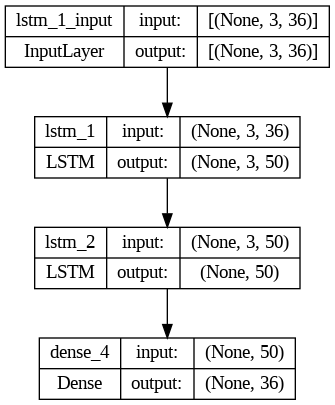

In [ ]:
plot_model(model, to_file="my_sequential_model.png", show_shapes=True)

In [ ]:
model2.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 2s 6ms/step - loss: 0.2177
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1994
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1703
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1357
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1014
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0798
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0683
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0607
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0557
Epoch 10/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0514
Epoch 11/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0483
Epoch 12/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0461
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
model1.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 6ms/step - loss: 0.2185
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1977
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1657
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1355
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1133
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0967
Epoch 7/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0845
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0744
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0653
Epoch 10/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0581
Epoch 11/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0528
Epoch 12/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 13/30
8/8 [==============================] - 0s 7ms/step - loss: 0.

In [ ]:
model.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 2s 6ms/step - loss: 0.2223
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.2097
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1903
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1521
Epoch 5/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1114
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0866
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0712
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0606
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0544
Epoch 10/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0503
Epoch 11/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0480
Epoch 12/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0464
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
y_pred2=model2.predict(test_x)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_pred1=model1.predict(test_x)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred=model.predict(test_x)

2/2 [==============================] - 0s 6ms/step


In [ ]:
mean_squared_error(test_y,y_pred)

0.07429267563808657

In [ ]:
mean_squared_error(test_y,y_pred1)

0.07632692440404702

In [ ]:
mean_squared_error(test_y,y_pred2)

0.07725283974807148

## Simple-RNN

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

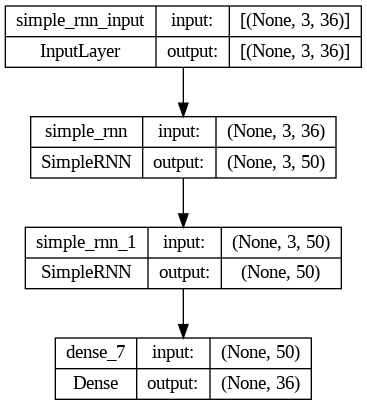

In [ ]:
plot_model(model, to_file="my_sequential_model_simpleRNN.png", show_shapes=True)

In [ ]:
model.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0334
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0330
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0326
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0322
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0314
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0311
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0304
Epoch 10/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0302
Epoch 11/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0297
Epoch 12/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0293
Epoch 13/30
8/8 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
y_pred=model.predict(test_x)
mean_squared_error(test_y,y_pred)

2/2 [==============================] - 0s 10ms/step


0.08114117581795151

## GRUs

In [ ]:
from keras.layers import GRU

In [ ]:
from keras.layers import GRU
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model.add(GRU(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 6ms/step - loss: 0.2011
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1555
Epoch 3/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1166
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0970
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0813
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0592
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0526
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0485
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0457
Epoch 11/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0434
Epoch 12/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0418
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 0

In [ ]:
y_pred=model.predict(test_x)
mean_squared_error(test_y,y_pred)

2/2 [==============================] - 0s 7ms/step


0.06982614524783747

In [ ]:
model1 = Sequential()
model1.add(GRU(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model1.add(GRU(50, activation='relu'))
model1.add(Dense(36))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model1.fit(train_x,train_y,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 5s 7ms/step - loss: 0.2171
Epoch 2/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1892
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1507
Epoch 4/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1090
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0845
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0682
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0600
Epoch 8/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0542
Epoch 9/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0502
Epoch 10/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0474
Epoch 11/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0451
Epoch 12/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0437
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 0.

In [ ]:
y_pred1=model.predict(test_x)
mean_squared_error(test_y,y_pred1)

2/2 [==============================] - 0s 7ms/step


0.06982614524783747

## Vanilla LSTM for Tabular Data - M1

In [ ]:
import pandas as pd
df=pd.read_excel("ftd_temporal_processed.xlsx",index_col="ID")

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-1):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    # ind1=x1['ID']
    # print(x1)
    y2=df.iloc[y1[j+1]]
    # ind2=y2['ID']
    X.append(x1.values)
    y.append(y2.values)




[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23]
[24, 25, 26, 27]
[28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39]
[40, 41, 42, 43]
[44, 45, 46, 47]
[48, 49, 50, 51]
[52, 53, 54, 55]
[56, 57, 58, 59]
[60, 61, 62, 63]
[64, 65, 66, 67]
[68, 69, 70, 71]
[72, 73, 74, 75]
[76, 77, 78, 79]
[80, 81, 82, 83]
[84, 85, 86, 87]
[88, 89, 90, 91]
[92, 93, 94, 95]
[96, 97, 98, 99]
[100, 101, 102, 103]
[104, 105, 106, 107]
[108, 109, 110, 111]
[112, 113, 114, 115]
[116, 117, 118, 119]
[120, 121, 122, 123]
[124, 125, 126, 127]
[128, 129, 130, 131]
[132, 133, 134, 135]
[136, 137, 138, 139]
[140, 141, 142, 143]
[144, 145, 146, 147]
[148, 149, 150, 151]
[152, 153, 154, 155]
[156, 157, 158, 159]
[160, 161, 162, 163]
[164, 165, 166, 167]
[168, 169, 170, 171]
[172, 173, 174, 175]
[176, 177, 178, 179]
[180, 181, 182, 183]
[184, 185, 186, 187]
[188, 189, 190, 191]
[192, 193, 194, 195]
[196, 197, 198, 199]
[200, 201, 202, 203]
[204, 205, 206, 207]
[208, 209, 210, 21

In [ ]:
len(y)

861

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(861, 36)

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [ ]:
for i in range(688):
  X_train.append(X[i])
  y_train.append(y[i])

In [ ]:
for i in range(688,861):
  X_test.append(X[i])
  y_test.append(y[i])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(688, 36)

In [ ]:
X_train=X_train.reshape(688,1,36)
X_test=X_test.reshape(173,1,36)

In [ ]:
X_train.shape, y_train.shape, X_train.shape, y_test.shape

((688, 1, 36), (688, 36), (688, 1, 36), (173, 36))

In [ ]:
selected_indices = random.sample(range(len(X_train)), 229)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_train = [X_train[i] for i in selected_indices]
s_y_train = [y_train[i] for i in selected_indices]

In [ ]:
selected_indices = random.sample(range(len(X_test)), 58)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_test = [X_test[i] for i in selected_indices]
s_y_test = [y_test[i] for i in selected_indices]

In [ ]:
s_X_train=np.array(s_X_train)
s_y_train=np.array(s_y_train)
s_X_test=np.array(s_X_test)
s_y_test=np.array(s_y_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((688, 1, 36), (688, 36), (173, 1, 36), (173, 36))

In [ ]:
s_X_train.shape, s_y_train.shape, s_X_test.shape, s_y_test.shape

((229, 1, 36), (229, 36), (58, 1, 36), (58, 36))

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(36))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(36))
model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 4ms/step - loss: 0.2142
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2050
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1921
Epoch 4/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1725
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1441
Epoch 6/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1185
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0873
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0786
Epoch 10/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0720
Epoch 11/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0655
Epoch 12/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 13/30
8/8 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
model1.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 5ms/step - loss: 0.2126
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.2011
Epoch 3/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1838
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1566
Epoch 5/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1214
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1016
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 8/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0817
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.0765
Epoch 10/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0712
Epoch 11/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0652
Epoch 12/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0592
Epoch 13/30
8/8 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
model.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 3s 8ms/step - loss: 0.2155
Epoch 2/30
8/8 [==============================] - 0s 7ms/step - loss: 0.2084
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1988
Epoch 4/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1837
Epoch 5/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1583
Epoch 6/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1229
Epoch 7/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1048
Epoch 8/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0925
Epoch 9/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0858
Epoch 10/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0810
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0763
Epoch 12/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0717
Epoch 13/30
8/8 [==============================] - 0s 9ms/step - loss: 0

In [ ]:
y_pred=model.predict(s_X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
# mean_squared_error(y_test,y_pred)

In [ ]:
mean_squared_error(s_y_test,y_pred)

0.07338247855971095

In [ ]:
y_pred1=model1.predict(s_X_test)

2/2 [==============================] - 1s 19ms/step


In [ ]:
mean_squared_error(s_y_test,y_pred1)

0.0711631677097347

In [ ]:
# mean_squared_error(s_y_test,y_pred1)

In [ ]:
y_pred2=model2.predict(s_X_test)

2/2 [==============================] - 1s 11ms/step


In [ ]:
mean_squared_error(s_y_test,y_pred2)

0.07196108142950111

## Different training set

In [ ]:
model.fit(X_train, y_train,epochs=30,verbose=1)

Epoch 1/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0379
Epoch 2/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0366
Epoch 3/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0356
Epoch 4/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0346
Epoch 5/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0336
Epoch 6/30
22/22 [==============================] - 0s 10ms/step - loss: 0.0325
Epoch 7/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0313
Epoch 8/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0303
Epoch 9/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0293
Epoch 10/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0288
Epoch 11/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0281
Epoch 12/30
22/22 [==============================] - 0s 10ms/step - loss: 0.0277
Epoch 13/30
22/22 [============================

In [ ]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 8ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.049903288603397114

#Simple RNN

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model.add(SimpleRNN(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train,epochs=30,verbose=1)

Epoch 1/30
22/22 [==============================] - 2s 3ms/step - loss: 0.1965
Epoch 2/30
22/22 [==============================] - 0s 3ms/step - loss: 0.1044
Epoch 3/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0706
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 5/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 6/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0392
Epoch 7/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0363
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 10/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0318
Epoch 11/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 12/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0297
Epoch 13/30
22/22 [==============================

In [ ]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 3ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.047380339698825436

#GRUs for M1 tabular

In [ ]:
model = Sequential()
model.add(GRU(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model.add(GRU(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train,epochs=30,verbose=1)

Epoch 1/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0216
Epoch 2/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 3/30
22/22 [==============================] - 0s 5ms/step - loss: 0.0214
Epoch 4/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 5/30
22/22 [==============================] - 0s 4ms/step - loss: 0.0211
Epoch 6/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0209
Epoch 7/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0209
Epoch 8/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0207
Epoch 9/30
22/22 [==============================] - 0s 7ms/step - loss: 0.0205
Epoch 10/30
22/22 [==============================] - 0s 8ms/step - loss: 0.0205
Epoch 11/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0202
Epoch 12/30
22/22 [==============================] - 0s 6ms/step - loss: 0.0203
Epoch 13/30
22/22 [==============================

In [ ]:
y_pred=model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.04406676406709367

In [ ]:
import joblib

In [ ]:
# joblib.dump(model,"drive/MyDrive/S_Only_LSTM_Model_M1.pkl")

In [ ]:
# joblib.dump(model1,"drive/MyDrive/S_Only_LSTM_Model1_M1.pkl")

In [ ]:
# joblib.dump(model2,"drive/MyDrive/S_Only_LSTM_Model2_M1.pkl")

# Model-M1 for Image Data

In [ ]:
import pandas as pd
df=pd.read_excel("drive/MyDrive/ftd_temporal_processed.xlsx")

In [ ]:
df.head(10)

,ID,EDUCATION,CDR_LANG,CDR_BEHAV,CDR_TOT,CDR_BOX_SCORE,MMSE_TOT,TRCOTOT,CORR10,INTR10,...,NPI_DISN,NPI_IRR,NPI_MOT,NPI_NITE,NPI_APP,FAQ_TAXES,FAQ_MEALPREP,FAQ_EVENTS,FAQ_PAYATTN,FAQ_REMDATES
0,subject_1_timestamp_0,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,...,0,0,0,0.000000,0,0.000,0.000,0.000,0.000000,0.000000
1,subject_1_timestamp_1,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.861111,0.777778,0.000000,...,0,0,0,0.000000,0,0.000,0.000,0.000,0.000000,0.000000
2,subject_1_timestamp_2,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.777778,0.666667,0.111111,...,0,0,0,0.000000,0,0.000,0.000,0.000,0.000000,0.000000
3,subject_1_timestamp_3,0.066667,0.000000,0.000000,0.000000,0.00000,1.000000,0.861111,1.000000,0.000000,...,0,0,0,0.000000,0,0.000,0.000,0.000,0.000000,0.000000
4,subject_2_timestamp_0,0.044444,0.166667,0.666667,0.333333,0.40625,0.966667,0.000000,0.000000,0.000000,...,1,0,1,0.000000,1,0.375,0.375,0.125,0.111111,0.333333
5,subject_2_timestamp_1,0.044444,0.166667,0.666667,0.333333,0.40625,0.966667,0.000000,0.000000,0.000000,...,1,0,1,0.000000,1,0.375,0.375,0.125,0.111111,0.333333
6,subject_2_timestamp_2,0.044444,0.666667,0.666667,0.666667,0.68750,0.733333,0.666667,0.000000,0.000000,...,1,0,1,0.111111,0,0.375,0.375,0.375,0.333333,1.000000
7,subject_2_timestamp_3,0.044444,0.666667,0.333333,0.666667,0.75000,0.733333,0.666667,0.000000,0.000000,...,1,0,1,0.111111,0,0.375,0.375,0.375,0.333333,1.000000
8,subject_3_timestamp_0,0.033333,0.666667,0.666667,0.166667,0.31250,0.966667,0.777778,0.555556,0.000000,...,1,1,0,0.000000,0,0.250,0.000,0.125,0.111111,0.666667
9,subject_3_timestamp_1,0.033333,0.333333,1.000000,0.333333,0.46875,1.000000,0.583333,0.000000,0.000000,...,1,1,1,0.000000,1,0.375,0.250,0.125,0.222222,1.000000


In [ ]:
df.shape

(1148, 37)

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-1):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    ind1=x1['ID']
    print(ind1)
    y2=df.iloc[y1[j+1]]
    ind2=y2['ID']
    X.append(ind1)
    y.append(ind2)




[0, 1, 2, 3]
subject_1_timestamp_0
subject_1_timestamp_1
subject_1_timestamp_2
[4, 5, 6, 7]
subject_2_timestamp_0
subject_2_timestamp_1
subject_2_timestamp_2
[8, 9, 10, 11]
subject_3_timestamp_0
subject_3_timestamp_1
subject_3_timestamp_2
[12, 13, 14, 15]
subject_4_timestamp_0
subject_4_timestamp_1
subject_4_timestamp_2
[16, 17, 18, 19]
subject_5_timestamp_0
subject_5_timestamp_1
subject_5_timestamp_2
[20, 21, 22, 23]
subject_6_timestamp_0
subject_6_timestamp_1
subject_6_timestamp_2
[24, 25, 26, 27]
subject_7_timestamp_0
subject_7_timestamp_1
subject_7_timestamp_2
[28, 29, 30, 31]
subject_8_timestamp_0
subject_8_timestamp_1
subject_8_timestamp_2
[32, 33, 34, 35]
subject_9_timestamp_0
subject_9_timestamp_1
subject_9_timestamp_2
[36, 37, 38, 39]
subject_10_timestamp_0
subject_10_timestamp_1
subject_10_timestamp_2
[40, 41, 42, 43]
subject_11_timestamp_0
subject_11_timestamp_1
subject_11_timestamp_2
[44, 45, 46, 47]
subject_12_timestamp_0
subject_12_timestamp_1
subject_12_timestamp_2
[48, 

In [ ]:
len(X)

861

In [ ]:
len(y)

861

In [ ]:
l1=[1,2,3,4,5,6,7,8,9,10]

In [ ]:
img_x=[]
for i in X:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_x.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject

In [ ]:

img_y=[]
for i in y:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_y.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject

In [ ]:
0.8*861

688.8000000000001

In [ ]:
X_train=[]
y_train=[]
X_test=[]
y_test=[]

In [ ]:
count=0
for i in img_x:
  if(count<687):
    X_train.append(i)
  else:
    X_test.append(i)
  count+=1


In [ ]:
count=0
for i in img_y:
  if(count<687):
    y_train.append(i)
  else:
    y_test.append(i)
  count+=1


In [ ]:
len(X_test)

174

In [ ]:
import random
random.seed(42)
selected_indices = random.sample(range(len(X_train)), 229)

In [ ]:
s_X_train = [X_train[i] for i in selected_indices]
s_y_train = [y_train[i] for i in selected_indices]

In [ ]:
import random
random.seed(42)
selected_indices = random.sample(range(len(X_test)), 58)

In [ ]:
s_X_test = [X_test[i] for i in selected_indices]
s_y_test = [y_test[i] for i in selected_indices]

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
s_X_train=np.array(s_X_train)
s_y_train=np.array(s_y_train)
s_X_test=np.array(s_X_test)
s_y_test=np.array(s_y_test)

In [ ]:
s_X_train.shape

(229, 6, 6)

In [ ]:
s_y_test.shape

(58, 6, 6)

In [ ]:
X_test=X_test.reshape((174,1,6,6))

In [ ]:
s_X_test=s_X_test.reshape((58,1,6,6))

In [ ]:
X_train=X_train.reshape((687,1,6,6))

In [ ]:
s_X_train=s_X_train.reshape((229,1,6,6))

In [ ]:
y_test=y_test.reshape((174,36))

In [ ]:
s_y_test=s_y_test.reshape((58,36))

In [ ]:
y_train=y_train.reshape((687,36))

In [ ]:
s_y_train=s_y_train.reshape((229,36))

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0
y_test=y_test/255.0
y_train=y_train/255.0

In [ ]:
s_X_train=s_X_train/255.0
s_X_test=s_X_test/255.0
s_y_test=s_y_test/255.0
s_y_train=s_y_train/255.0

In [ ]:
model_m1 = Sequential()
model_m1.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(1,6,6,1),return_sequences=True))
model_m1.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model_m1.add(Flatten())
model_m1.add(Dense(36,activation='relu'))
model_m1.compile(optimizer='adam', loss='mse')

In [ ]:
model_m1.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 9s 29ms/step - loss: 0.1478
Epoch 2/30
8/8 [==============================] - 0s 30ms/step - loss: 0.1400
Epoch 3/30
8/8 [==============================] - 0s 30ms/step - loss: 0.1236
Epoch 4/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0958
Epoch 5/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0779
Epoch 6/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0672
Epoch 7/30
8/8 [==============================] - 0s 32ms/step - loss: 0.0628
Epoch 8/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0600
Epoch 9/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0575
Epoch 10/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0547
Epoch 11/30
8/8 [==============================] - 0s 33ms/step - loss: 0.0511
Epoch 12/30
8/8 [==============================] - 0s 47ms/step - loss: 0.0471
Epoch 13/30
8/8 [==============================] - 0s 54ms/st

## M1 Image data results

In [ ]:
y_pred=model_m1.predict(s_X_test)

2/2 [==============================] - 2s 17ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.04615144213157319

In [ ]:
mean_squared_error(s_y_test,y_pred)

0.050469925834511355

In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
import joblib
joblib.dump(model_m1,"drive/MyDrive/S_Model_M1.pkl")

['drive/MyDrive/S_Model_M1.pkl']

In [ ]:
model1_m1 = Sequential()
model1_m1.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(1,6,6,1),return_sequences=True))
model1_m1.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model1_m1.add(Flatten())
model1_m1.add(Dense(36,activation='relu'))
model1_m1.compile(optimizer='adam', loss='mse')

In [ ]:
model1_m1.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 26ms/step - loss: 0.1478
Epoch 2/30
8/8 [==============================] - 0s 27ms/step - loss: 0.1397
Epoch 3/30
8/8 [==============================] - 0s 27ms/step - loss: 0.1220
Epoch 4/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0931
Epoch 5/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0776
Epoch 6/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0696
Epoch 7/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0671
Epoch 8/30
8/8 [==============================] - 0s 29ms/step - loss: 0.0648
Epoch 9/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0635
Epoch 10/30
8/8 [==============================] - 0s 26ms/step - loss: 0.0621
Epoch 11/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0604
Epoch 12/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0586
Epoch 13/30
8/8 [==============================] - 0s 29ms/st

In [ ]:
y_pred1=model1_m1.predict(s_X_test)

2/2 [==============================] - 1s 32ms/step


In [ ]:
mean_squared_error(y_test,y_pred1)

0.042725215626548844

In [ ]:
mean_squared_error(s_y_test,y_pred1)

0.05494525164480576

In [ ]:
joblib.dump(model1_m1,"drive/MyDrive/S_Model1_M1.pkl")

['drive/MyDrive/S_Model1_M1.pkl']

In [ ]:
model2_m1 = Sequential()
model2_m1.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(1,6,6,1),return_sequences=True))
model2_m1.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model2_m1.add(Flatten())
model2_m1.add(Dense(36,activation='relu'))
model2_m1.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m1.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 28ms/step - loss: 0.1478
Epoch 2/30
8/8 [==============================] - 0s 26ms/step - loss: 0.1403
Epoch 3/30
8/8 [==============================] - 0s 25ms/step - loss: 0.1242
Epoch 4/30
8/8 [==============================] - 0s 31ms/step - loss: 0.0961
Epoch 5/30
8/8 [==============================] - 0s 55ms/step - loss: 0.0789
Epoch 6/30
8/8 [==============================] - 0s 54ms/step - loss: 0.0695
Epoch 7/30
8/8 [==============================] - 0s 31ms/step - loss: 0.0643
Epoch 8/30
8/8 [==============================] - 0s 27ms/step - loss: 0.0602
Epoch 9/30
8/8 [==============================] - 0s 28ms/step - loss: 0.0574
Epoch 10/30
8/8 [==============================] - 0s 24ms/step - loss: 0.0545
Epoch 11/30
8/8 [==============================] - 0s 24ms/step - loss: 0.0517
Epoch 12/30
8/8 [==============================] - 0s 23ms/step - loss: 0.0481
Epoch 13/30
8/8 [==============================] - 0s 23ms/st

In [ ]:
y_pred2=model1_m1.predict(s_X_test)

2/2 [==============================] - 0s 13ms/step


In [ ]:
mean_squared_error(y_test,y_pred2)

0.042725215626548844

In [ ]:
mean_squared_error(s_y_test,y_pred2)

0.05494525164480576

In [ ]:
joblib.dump(model2_m1,"drive/MyDrive/S_Model2_M1.pkl")

['drive/MyDrive/S_Model2_M1.pkl']

**Model**-M2 Image data

In [ ]:
import pandas as pd
df=pd.read_excel("drive/MyDrive/ftd_temporal_processed.xlsx")

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-2):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    ind1=x1['ID']
    x1=df.iloc[y1[j+1]]
    ind3=x1['ID']
    print(ind1)
    y2=df.iloc[y1[j+2]]
    ind2=y2['ID']
    X.append(ind1)
    X.append(ind3)
    y.append(ind2)




[0, 1, 2, 3]
subject_1_timestamp_0
subject_1_timestamp_1
[4, 5, 6, 7]
subject_2_timestamp_0
subject_2_timestamp_1
[8, 9, 10, 11]
subject_3_timestamp_0
subject_3_timestamp_1
[12, 13, 14, 15]
subject_4_timestamp_0
subject_4_timestamp_1
[16, 17, 18, 19]
subject_5_timestamp_0
subject_5_timestamp_1
[20, 21, 22, 23]
subject_6_timestamp_0
subject_6_timestamp_1
[24, 25, 26, 27]
subject_7_timestamp_0
subject_7_timestamp_1
[28, 29, 30, 31]
subject_8_timestamp_0
subject_8_timestamp_1
[32, 33, 34, 35]
subject_9_timestamp_0
subject_9_timestamp_1
[36, 37, 38, 39]
subject_10_timestamp_0
subject_10_timestamp_1
[40, 41, 42, 43]
subject_11_timestamp_0
subject_11_timestamp_1
[44, 45, 46, 47]
subject_12_timestamp_0
subject_12_timestamp_1
[48, 49, 50, 51]
subject_13_timestamp_0
subject_13_timestamp_1
[52, 53, 54, 55]
subject_14_timestamp_0
subject_14_timestamp_1
[56, 57, 58, 59]
subject_15_timestamp_0
subject_15_timestamp_1
[60, 61, 62, 63]
subject_16_timestamp_0
subject_16_timestamp_1
[64, 65, 66, 67]
sub

In [ ]:
img_x=[]
for i in X:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_x.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject

In [ ]:
len(img_x)

1148

In [ ]:

img_y=[]
for i in y:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_y.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_1_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_2_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_3_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_4_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_5_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_6_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_6_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_7_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_7_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_8_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject

In [ ]:
len(img_y)

574

In [ ]:
574*2

1148

In [ ]:
1148*0.8

918.4000000000001

In [ ]:
# 229 - train size
# 58 test_size

In [ ]:
X_train=[]
X_test=[]
y_test=[]
y_train=[]

In [ ]:
count=0
for i in img_x:
  if(count<918):
    X_train.append(i)
  else:
    X_test.append(i)
  count+=1

In [ ]:
count=0
for i in img_y:
  if(count<459):
    y_train.append(i)
  else:
    y_test.append(i)
  count+=1

In [ ]:
len(X_test)

230

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
s_y_test.shape

(58, 36)

In [ ]:
X_train=X_train.reshape(459,2,6,6)

In [ ]:
X_test=X_test.reshape(115,2,6,6)

In [ ]:
y_test.shape

(115, 6, 6)

In [ ]:
y_test=y_test.reshape(115,36)

In [ ]:
y_train.shape

(459, 6, 6)

In [ ]:
y_train=y_train.reshape(459,36)

In [ ]:
y_train.shape

(459, 36)

In [ ]:
selected_indices = random.sample(range(len(X_train)), 229)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_train = [X_train[i] for i in selected_indices]
s_y_train = [y_train[i] for i in selected_indices]

In [ ]:
selected_indices = random.sample(range(len(X_test)), 58)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_test = [X_test[i] for i in selected_indices]
s_y_test = [y_test[i] for i in selected_indices]

In [ ]:
s_X_train=np.array(s_X_train)
s_y_train=np.array(s_y_train)
s_X_test=np.array(s_X_test)
s_y_test=np.array(s_y_test)

In [ ]:
s_X_train=s_X_train/255.0
s_X_test=s_X_test/255.0
s_y_test=s_y_test/255.0
s_y_train=s_y_train/255.0

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0
y_train=y_train/255.0
y_test=y_test/255.0

In [ ]:
model_m2 = Sequential()
model_m2.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(2,6,6,1),return_sequences=True))
model_m2.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model_m2.add(Flatten())
model_m2.add(Dense(36,activation='relu'))
model_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model1_m2 = Sequential()
model1_m2.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(2,6,6,1),return_sequences=True))
model1_m2.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model1_m2.add(Flatten())
model1_m2.add(Dense(36,activation='relu'))
model1_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m2 = Sequential()
model2_m2.add(ConvLSTM2D(filters=64, kernel_size=3, activation='relu', input_shape=(2,6,6,1),return_sequences=True))
model2_m2.add(ConvLSTM2D(filters=32, kernel_size=3, activation='relu'))
model2_m2.add(Flatten())
model2_m2.add(Dense(36,activation='relu'))
model2_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model1_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 12s 112ms/step - loss: 0.1498
Epoch 2/30
8/8 [==============================] - 1s 87ms/step - loss: 0.1377
Epoch 3/30
8/8 [==============================] - 1s 86ms/step - loss: 0.1086
Epoch 4/30
8/8 [==============================] - 1s 83ms/step - loss: 0.0871
Epoch 5/30
8/8 [==============================] - 1s 90ms/step - loss: 0.0749
Epoch 6/30
8/8 [==============================] - 1s 84ms/step - loss: 0.0697
Epoch 7/30
8/8 [==============================] - 1s 77ms/step - loss: 0.0646
Epoch 8/30
8/8 [==============================] - 0s 46ms/step - loss: 0.0602
Epoch 9/30
8/8 [==============================] - 0s 50ms/step - loss: 0.0552
Epoch 10/30
8/8 [==============================] - 0s 46ms/step - loss: 0.0497
Epoch 11/30
8/8 [==============================] - 0s 44ms/step - loss: 0.0441
Epoch 12/30
8/8 [==============================] - 0s 50ms/step - loss: 0.0400
Epoch 13/30
8/8 [==============================] - 0s 46ms/

In [ ]:
model2_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 12s 115ms/step - loss: 0.1496
Epoch 2/30
8/8 [==============================] - 1s 79ms/step - loss: 0.1360
Epoch 3/30
8/8 [==============================] - 1s 105ms/step - loss: 0.1009
Epoch 4/30
8/8 [==============================] - 1s 87ms/step - loss: 0.0845
Epoch 5/30
8/8 [==============================] - 1s 91ms/step - loss: 0.0762
Epoch 6/30
8/8 [==============================] - 1s 85ms/step - loss: 0.0713
Epoch 7/30
8/8 [==============================] - 1s 134ms/step - loss: 0.0664
Epoch 8/30
8/8 [==============================] - 1s 97ms/step - loss: 0.0612
Epoch 9/30
8/8 [==============================] - 1s 95ms/step - loss: 0.0572
Epoch 10/30
8/8 [==============================] - 1s 78ms/step - loss: 0.0556
Epoch 11/30
8/8 [==============================] - 1s 98ms/step - loss: 0.0551
Epoch 12/30
8/8 [==============================] - 1s 122ms/step - loss: 0.0547
Epoch 13/30
8/8 [==============================] - 1s 99

In [ ]:
model_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 10s 89ms/step - loss: 0.1488
Epoch 2/30
8/8 [==============================] - 1s 81ms/step - loss: 0.1302
Epoch 3/30
8/8 [==============================] - 1s 79ms/step - loss: 0.0923
Epoch 4/30
8/8 [==============================] - 1s 84ms/step - loss: 0.0787
Epoch 5/30
8/8 [==============================] - 1s 100ms/step - loss: 0.0748
Epoch 6/30
8/8 [==============================] - 1s 104ms/step - loss: 0.0717
Epoch 7/30
8/8 [==============================] - 1s 110ms/step - loss: 0.0682
Epoch 8/30
8/8 [==============================] - 1s 113ms/step - loss: 0.0635
Epoch 9/30
8/8 [==============================] - 1s 110ms/step - loss: 0.0583
Epoch 10/30
8/8 [==============================] - 1s 91ms/step - loss: 0.0544
Epoch 11/30
8/8 [==============================] - 1s 109ms/step - loss: 0.0525
Epoch 12/30
8/8 [==============================] - 1s 76ms/step - loss: 0.0508
Epoch 13/30
8/8 [==============================] - 1s 

In [ ]:
joblib.dump(model_m2,"drive/MyDrive/S_Model_M2.pkl")

['drive/MyDrive/S_Model_M2.pkl']

In [ ]:
joblib.dump(model1_m2,"drive/MyDrive/S_Model1_M2.pkl")

['drive/MyDrive/S_Model1_M2.pkl']

In [ ]:
joblib.dump(model2_m2,"drive/MyDrive/S_Model2_M2.pkl")

['drive/MyDrive/S_Model2_M2.pkl']

In [ ]:
X_test.shape

(115, 2, 6, 6)

In [ ]:
y_pred=model_m2.predict(s_X_test)

2/2 [==============================] - 1s 29ms/step


In [ ]:
y_pred1=model1_m2.predict(s_X_test)

2/2 [==============================] - 1s 28ms/step


In [ ]:
y_pred2=model2_m2.predict(s_X_test)

2/2 [==============================] - 1s 18ms/step


In [ ]:
y1=X_test[0]

In [ ]:
y1=y1.reshape(1,2,6,6,1)

In [ ]:
y1


array([[[[0.64814815],
         [0.        ],
         [0.20833333],
         [0.27777778],
         [0.38888889],
         [0.36111111]],

        [[0.01984127],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.02777778],
         [0.09259259],
         [0.        ],
         [0.55555556],
         [0.        ]],

        [[0.09259259],
         [0.        ],
         [0.20833333],
         [0.13888889],
         [0.15625   ],
         [0.83333333]],

        [[0.        ],
         [0.10416667],
         [0.20833333],
         [0.27777778],
         [0.83333333],
         [0.83333333]],

        [[0.83333333],
         [0.        ],
         [0.55555556],
         [0.        ],
         [0.83333333],
         [0.83333333]]],


       [[[0.64814815],
         [0.        ],
         [0.20833333],
         [0.27777778],
         [0.38888889],
         [0.36111111]],

        [[0.019841

In [ ]:
y_pred=model_m2.predict(y1)

1/1 [==============================] - 0s 29ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.06919352077531679

In [ ]:
mean_squared_error(s_y_test,y_pred)

0.06340900134723838

In [ ]:
mean_squared_error(y_test,y_pred1)

0.056331405645084355

In [ ]:
mean_squared_error(s_y_test,y_pred1)

0.05261661019664297

In [ ]:
mean_squared_error(s_y_test,y_pred2)

0.06499179662148455

In [ ]:
mean_squared_error(y_test,y_pred2)

## Combined-Architecture time t0 -> M1 -> M1 -> M1

In [ ]:
import pandas as pd
df=pd.read_excel("drive/MyDrive/ftd_temporal_processed.xlsx")

In [ ]:
229*4


916

In [ ]:
916+(58*4)

1148

In [ ]:
test1=[]
test2=[]
test3=[]
test4=[]
for i in range(229,287):
  y=[]
  y.append(i*4+0)
  y.append(i*4+1)
  y.append(i*4+2)
  y.append(i*4+3)
  count=0
  for j in y:
    x1=df.iloc[j]
    # print(x1)
    # print(x1.index)
    ind1=x1['ID']
    if(count==0):
      test1.append(ind1)
    elif(count==1):
      test2.append(ind1)
    elif(count==2):
      test3.append(ind1)
    else:
      test4.append(ind1)
    count+=1


In [ ]:
len(test1)

58

In [ ]:
img_1=[]
for i in test1:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_1.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_230_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_231_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_232_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_233_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_234_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_235_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_236_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_237_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_238_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_239_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_240_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_241_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_242_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_243_timestamp_0_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_244_timestamp_0_data.txt
drive/MyDr

In [ ]:
img_2=[]
for i in test2:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_2.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_230_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_231_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_232_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_233_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_234_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_235_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_236_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_237_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_238_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_239_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_240_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_241_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_242_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_243_timestamp_1_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_244_timestamp_1_data.txt
drive/MyDr

In [ ]:
img_3=[]
for i in test3:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_3.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_230_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_231_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_232_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_233_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_234_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_235_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_236_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_237_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_238_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_239_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_240_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_241_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_242_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_243_timestamp_2_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_244_timestamp_2_data.txt
drive/MyDr

In [ ]:
img_4=[]
for i in test4:
  s="drive/MyDrive/Test1/Test_1/data/_"+i+"_data.txt"
  img=np.loadtxt(s)
  print(s)
  img_4.append(img)





drive/MyDrive/Test1/Test_1/data/_subject_230_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_231_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_232_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_233_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_234_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_235_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_236_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_237_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_238_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_239_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_240_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_241_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_242_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_243_timestamp_3_data.txt
drive/MyDrive/Test1/Test_1/data/_subject_244_timestamp_3_data.txt
drive/MyDr

In [ ]:
img_1=np.array(img_1)

In [ ]:
img_2=np.array(img_2)
img_3=np.array(img_3)
img_4=np.array(img_4)

In [ ]:
img_2=img_2.reshape(58,36)
img_3=img_3.reshape(58,36)
img_4=img_4.reshape(58,36)

In [ ]:
img_1=img_1/255.0
img_2=img_2/255.0
img_3=img_3/255.0
img_4=img_4/255.0


In [ ]:
img_1.shape

(58, 6, 6)

In [ ]:
img_1=img_1.reshape(58,1,6,6)

In [ ]:
import joblib

In [ ]:
model_m1=joblib.load("drive/MyDrive/S_Model_M1.pkl")

In [ ]:
model1_m1=joblib.load("drive/MyDrive/S_Model1_M1.pkl")
model2_m1=joblib.load("drive/MyDrive/S_Model2_M1.pkl")

In [ ]:
y_pred_t2=model_m1.predict(img_1)

2/2 [==============================] - 1s 18ms/step


In [ ]:
y_pred_t2_1=model1_m1.predict(img_1)

2/2 [==============================] - 1s 23ms/step


In [ ]:
y_pred_t2_2=model2_m1.predict(img_1)

2/2 [==============================] - 1s 23ms/step


## This is the error when given the 1st time stamp and predicted the **second**

In [ ]:
mean_squared_error(img_2,y_pred_t2)

0.03974014215296325

In [ ]:
mean_squared_error(img_2,y_pred_t2)

0.04837582431812445

In [ ]:
mean_squared_error(img_2,y_pred_t2_1)

0.03595540562880748

In [ ]:
mean_squared_error(img_2,y_pred_t2_1)

0.05360440627888601

In [ ]:
mean_squared_error(img_2,y_pred_t2_2)

0.04604627569115374

In [ ]:
y_pred_t2=y_pred_t2.reshape(58,1,6,6)

In [ ]:
y_pred_t2_1=y_pred_t2_1.reshape(58,1,6,6)

In [ ]:
y_pred_t2_2=y_pred_t2_2.reshape(58,1,6,6)

In [ ]:
y_pred_t3=model_m1.predict(y_pred_t2)

2/2 [==============================] - 0s 10ms/step


In [ ]:
y_pred_t3_1=model1_m1.predict(y_pred_t2_1)

2/2 [==============================] - 0s 10ms/step


In [ ]:
y_pred_t3_2=model2_m1.predict(y_pred_t2_2)

2/2 [==============================] - 0s 9ms/step


In [ ]:
mean_squared_error(img_3,y_pred_t3)

0.05655603270337154

In [ ]:
mean_squared_error(img_3,y_pred_t3)

0.060034386598944195

In [ ]:
mean_squared_error(img_3,y_pred_t3_1)

0.050937406206204065

In [ ]:
mean_squared_error(img_3,y_pred_t3_1)

0.06523003022267986

In [ ]:
mean_squared_error(img_3,y_pred_t3_2)

0.05851824596428268

In [ ]:
y_pred_t3=y_pred_t3.reshape(58,1,6,6)

In [ ]:
y_pred_t3_1=y_pred_t3_1.reshape(58,1,6,6)

In [ ]:
y_pred_t3_2=y_pred_t3_2.reshape(58,1,6,6)

In [ ]:
y_pred_t4=model_m1.predict(y_pred_t3)

2/2 [==============================] - 0s 10ms/step


In [ ]:
y_pred_t4_1=model1_m1.predict(y_pred_t3_1)

2/2 [==============================] - 0s 10ms/step


In [ ]:
y_pred_t4_2=model2_m1.predict(y_pred_t3_2)

2/2 [==============================] - 0s 10ms/step


In [ ]:
mean_squared_error(img_4,y_pred_t4)

0.07078253645626983

In [ ]:
mean_squared_error(img_4,y_pred_t4)

0.07073278326242663

In [ ]:
mean_squared_error(img_4,y_pred_t4_1)

0.06641986765164914

In [ ]:
mean_squared_error(img_4,y_pred_t4_1)

0.07742441731010603

In [ ]:
mean_squared_error(img_4,y_pred_t4_2)

0.07369162724621958

## M1-> M2 -> M2

In [ ]:
img_1.shape

(58, 6, 6)

In [ ]:
y_pred_t2.shape

(58, 1, 6, 6)

In [ ]:
img_12=[]
for i in range(0,58):
  img_12.append(img_1[i])
  img_12.append(y_pred_t2[i])

In [ ]:
img_12_1=[]
for i in range(0,58):
  img_12_1.append(img_1[i])
  img_12_1.append(y_pred_t2_1[i])

In [ ]:
img_12_2=[]
for i in range(0,58):
  img_12_2.append(img_1[i])
  img_12_2.append(y_pred_t2_2[i])

In [ ]:
len(img_12)

116

In [ ]:
img_12=np.array(img_12)

In [ ]:
img_12_1=np.array(img_12_1)

In [ ]:
img_12_2=np.array(img_12_2)

In [ ]:
img_12=img_12.reshape(58,2,6,6)

In [ ]:
img_12_1=img_12_1.reshape(58,2,6,6)

In [ ]:
img_12_2=img_12_2.reshape(58,2,6,6)

In [ ]:
model_m2=joblib.load("drive/MyDrive/S_Model_M2.pkl")

In [ ]:
model1_m2=joblib.load("drive/MyDrive/S_Model1_M2.pkl")

In [ ]:
model2_m2=joblib.load("drive/MyDrive/S_Model1_M2.pkl")

In [ ]:
y_pred_t3_g12=model_m2.predict(img_12)

2/2 [==============================] - 0s 14ms/step


In [ ]:
y_pred_t3_1_g12=model1_m2.predict(img_12_1)

2/2 [==============================] - 0s 14ms/step


In [ ]:
y_pred_t3_2_g12=model2_m2.predict(img_12_2)

2/2 [==============================] - 1s 19ms/step


In [ ]:
mean_squared_error(img_3,y_pred_t3_g12)

0.06599933230322573

In [ ]:
mean_squared_error(img_3,y_pred_t3_g12)

0.06058017857734352

In [ ]:
mean_squared_error(img_3,y_pred_t3_1_g12)

0.05252315462819489

In [ ]:
mean_squared_error(img_3,y_pred_t3_1_g12)

0.050641805058997624

In [ ]:
mean_squared_error(img_3,y_pred_t3_2_g12)

0.05033430854641144

In [ ]:
y_pred_t3_g12=y_pred_t3_g12.reshape(58,1,6,6)

In [ ]:
y_pred_t3_1_g12=y_pred_t3_1_g12.reshape(58,1,6,6)

In [ ]:
y_pred_t3_2_g12=y_pred_t3_2_g12.reshape(58,1,6,6)

In [ ]:
img_23=[]
for i in range(58):
  img_23.append(y_pred_t2[i])
  img_23.append(y_pred_t3_g12[i])

In [ ]:
img_23_1=[]
for i in range(58):
  img_23_1.append(y_pred_t2_1[i])
  img_23_1.append(y_pred_t3_1_g12[i])

In [ ]:
img_23_2=[]
for i in range(58):
  img_23_2.append(y_pred_t2_2[i])
  img_23_2.append(y_pred_t3_2_g12[i])

In [ ]:
img_23=np.array(img_23)

In [ ]:
img_23_1=np.array(img_23_1)

In [ ]:
img_23_2=np.array(img_23_2)

In [ ]:
img_23.shape

(116, 1, 6, 6)

In [ ]:
img_23_1.shape

(116, 1, 6, 6)

In [ ]:
img_23_2=np.array(img_23_2)

In [ ]:
img_23=img_23.reshape(58,2,6,6)

In [ ]:
img_23_1=img_23_1.reshape(58,2,6,6)

In [ ]:
img_23_2=img_23_2.reshape(58,2,6,6)

In [ ]:
y_pred_t4_g23=model_m2.predict(img_23)

2/2 [==============================] - 0s 47ms/step


In [ ]:
y_pred_t4_g23_1=model1_m2.predict(img_23_1)

2/2 [==============================] - 0s 33ms/step


In [ ]:
y_pred_t4_g23_2=model2_m2.predict(img_23_2)

2/2 [==============================] - 0s 29ms/step


In [ ]:
mean_squared_error(img_4,y_pred_t4_g23)

0.07889286052549971

In [ ]:
mean_squared_error(img_4,y_pred_t4_g23)

0.0740800699336094

In [ ]:
mean_squared_error(img_4,y_pred_t4_g23_1)

0.07041369808139702

In [ ]:
mean_squared_error(img_4,y_pred_t4_g23_1)

0.0629248770457718

In [ ]:
mean_squared_error(img_4,y_pred_t4_g23_2)

0.06264315544909943

## M1->M2->M3

In [ ]:
img_123=[]
for i in range(58):
  img_123.append(img_1[i])
  img_123.append(y_pred_t2[i])
  img_123.append(y_pred_t3_g12[i])

In [ ]:
img_123_1=[]
for i in range(58):
  img_123_1.append(img_1[i])
  img_123_1.append(y_pred_t2_1[i])
  img_123_1.append(y_pred_t3_1_g12[i])

In [ ]:
img_123_2=[]
for i in range(58):
  img_123_2.append(img_1[i])
  img_123_2.append(y_pred_t2_2[i])
  img_123_2.append(y_pred_t3_2_g12[i])

In [ ]:
img_123=np.array(img_123)

In [ ]:
img_123_1=np.array(img_123_1)

In [ ]:
img_123_2=np.array(img_123_2)

In [ ]:
img_123.shape

(174, 1, 6, 6)

In [ ]:
img_123=img_123.reshape(58,3,6,6)

In [ ]:
img_123_1=img_123_1.reshape(58,3,6,6)

In [ ]:
img_123_2=img_123_2.reshape(58,3,6,6)

In [ ]:
model_m3=joblib.load("drive/MyDrive/Model_M3.pkl")

In [ ]:
model1_m3=joblib.load("drive/MyDrive/Model1_M3.pkl")

In [ ]:
model2_m3=joblib.load("drive/MyDrive/Model2_M3.pkl")

In [ ]:
y_pred_t4_g123=model_m3.predict(img_123)

2/2 [==============================] - 1s 29ms/step


In [ ]:
y_pred_t4_g123_1=model1_m3.predict(img_123_1)

2/2 [==============================] - 1s 27ms/step


In [ ]:
y_pred_t4_g123_2=model2_m3.predict(img_123_2)

2/2 [==============================] - 2s 39ms/step


In [ ]:
mean_squared_error(img_4,y_pred_t4_g123)

0.06402338499694424

In [ ]:
mean_squared_error(img_4,y_pred_t4_g123)

0.06499738733691279

In [ ]:
mean_squared_error(img_4,y_pred_t4_g123_1)

0.0743933812981379

In [ ]:
mean_squared_error(img_4,y_pred_t4_g123_1)

0.07515876812427952

In [ ]:
mean_squared_error(img_4,y_pred_t4_g123_2)

0.06984065631127082

## Vanilla LSTM for Tabular Data - M1



In [ ]:
import pandas as pd
df=pd.read_excel("ftd_temporal_processed.xlsx",index_col="ID")

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-1):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    # ind1=x1['ID']
    # print(x1)
    y2=df.iloc[y1[j+1]]
    # ind2=y2['ID']
    X.append(x1.values)
    y.append(y2.values)




[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23]
[24, 25, 26, 27]
[28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39]
[40, 41, 42, 43]
[44, 45, 46, 47]
[48, 49, 50, 51]
[52, 53, 54, 55]
[56, 57, 58, 59]
[60, 61, 62, 63]
[64, 65, 66, 67]
[68, 69, 70, 71]
[72, 73, 74, 75]
[76, 77, 78, 79]
[80, 81, 82, 83]
[84, 85, 86, 87]
[88, 89, 90, 91]
[92, 93, 94, 95]
[96, 97, 98, 99]
[100, 101, 102, 103]
[104, 105, 106, 107]
[108, 109, 110, 111]
[112, 113, 114, 115]
[116, 117, 118, 119]
[120, 121, 122, 123]
[124, 125, 126, 127]
[128, 129, 130, 131]
[132, 133, 134, 135]
[136, 137, 138, 139]
[140, 141, 142, 143]
[144, 145, 146, 147]
[148, 149, 150, 151]
[152, 153, 154, 155]
[156, 157, 158, 159]
[160, 161, 162, 163]
[164, 165, 166, 167]
[168, 169, 170, 171]
[172, 173, 174, 175]
[176, 177, 178, 179]
[180, 181, 182, 183]
[184, 185, 186, 187]
[188, 189, 190, 191]
[192, 193, 194, 195]
[196, 197, 198, 199]
[200, 201, 202, 203]
[204, 205, 206, 207]
[208, 209, 210, 21

In [ ]:
len(y)

861

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X.shape

(861, 36)

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [ ]:
for i in range(688):
  X_train.append(X[i])
  y_train.append(y[i])

In [ ]:
for i in range(688,861):
  X_test.append(X[i])
  y_test.append(y[i])

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(688, 36)

In [ ]:
X_train=X_train.reshape(688,1,36)
X_test=X_test.reshape(173,1,36)

In [ ]:
selected_indices = random.sample(range(len(X_train)), 229)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_train = [X_train[i] for i in selected_indices]
s_y_train = [y_train[i] for i in selected_indices]

In [ ]:
selected_indices = random.sample(range(len(X_test)), 58)

# Retrieve corresponding X_train[i] and y_train[i]
s_X_test = [X_test[i] for i in selected_indices]
s_y_test = [y_test[i] for i in selected_indices]

In [ ]:
s_X_train=np.array(s_X_train)
s_y_train=np.array(s_y_train)
s_X_test=np.array(s_X_test)
s_y_test=np.array(s_y_test)

In [ ]:
s_X_train.shape

(229, 1, 36)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(36))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model1.add(LSTM(50, activation='relu'))
model1.add(Dense(36))
model1.compile(optimizer='adam', loss='mse')

In [ ]:
model2 = Sequential()
model2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1, 36)))
model2.add(LSTM(50, activation='relu'))
model2.add(Dense(36))
model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 7s 9ms/step - loss: 0.2126
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 0.2035
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1909
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1712
Epoch 5/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1432
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1168
Epoch 7/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0997
Epoch 8/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0855
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0766
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0704
Epoch 11/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0638
Epoch 12/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0578
Epoch 13/30
8/8 [==============================] - 0s 9ms/step - loss: 0

In [ ]:
model1.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 8ms/step - loss: 0.2109
Epoch 2/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1995
Epoch 3/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1823
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1550
Epoch 5/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1212
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1022
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0883
Epoch 8/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0808
Epoch 9/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0755
Epoch 10/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0704
Epoch 11/30
8/8 [==============================] - 0s 12ms/step - loss: 0.0643
Epoch 12/30
8/8 [==============================] - 0s 13ms/step - loss: 0.0577
Epoch 13/30
8/8 [==============================] - 0s 12ms/ste

In [ ]:
model.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 9s 9ms/step - loss: 0.2139
Epoch 2/30
8/8 [==============================] - 0s 8ms/step - loss: 0.2069
Epoch 3/30
8/8 [==============================] - 0s 7ms/step - loss: 0.1975
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1824
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1581
Epoch 6/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1238
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.1049
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0920
Epoch 9/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0837
Epoch 10/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0785
Epoch 11/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0737
Epoch 12/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0679
Epoch 13/30
8/8 [==============================] - 0s 6ms/step - loss: 

In [ ]:
y_pred=model.predict(s_X_test)

2/2 [==============================] - 1s 7ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.05153223859378136

In [ ]:
mean_squared_error(s_y_test,y_pred)

0.07140747572177675

In [ ]:
y_pred1=model1.predict(s_X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
mean_squared_error(y_test,y_pred1)

0.053191326292783704

In [ ]:
mean_squared_error(s_y_test,y_pred1)

0.0694257939036989

In [ ]:
y_pred2=model2.predict(s_X_test)

2/2 [==============================] - 0s 6ms/step


In [ ]:
mean_squared_error(y_test,y_pred2)

0.051519918149844274

In [ ]:
mean_squared_error(s_y_test,y_pred2)

0.07187022813467986

In [ ]:
import joblib

In [ ]:
joblib.dump(model,"drive/MyDrive/S_Only_LSTM_Model_M1.pkl")

['drive/MyDrive/S_Only_LSTM_Model_M1.pkl']

In [ ]:
joblib.dump(model1,"drive/MyDrive/S_Only_LSTM_Model1_M1.pkl")

['drive/MyDrive/S_Only_LSTM_Model1_M1.pkl']

In [ ]:
joblib.dump(model2,"drive/MyDrive/S_Only_LSTM_Model2_M1.pkl")

['drive/MyDrive/S_Only_LSTM_Model2_M1.pkl']

## ONLY LSTM M2

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-2):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    # ind1=x1['ID']
    # print(x1)
    x2=df.iloc[y1[j+1]]
    # ind2=y2['ID']
    X.append(x1.values)
    X.append(x2.values)
    y2=df.iloc[y1[j+2]]
    y.append(y2.values)




[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23]
[24, 25, 26, 27]
[28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39]
[40, 41, 42, 43]
[44, 45, 46, 47]
[48, 49, 50, 51]
[52, 53, 54, 55]
[56, 57, 58, 59]
[60, 61, 62, 63]
[64, 65, 66, 67]
[68, 69, 70, 71]
[72, 73, 74, 75]
[76, 77, 78, 79]
[80, 81, 82, 83]
[84, 85, 86, 87]
[88, 89, 90, 91]
[92, 93, 94, 95]
[96, 97, 98, 99]
[100, 101, 102, 103]
[104, 105, 106, 107]
[108, 109, 110, 111]
[112, 113, 114, 115]
[116, 117, 118, 119]
[120, 121, 122, 123]
[124, 125, 126, 127]
[128, 129, 130, 131]
[132, 133, 134, 135]
[136, 137, 138, 139]
[140, 141, 142, 143]
[144, 145, 146, 147]
[148, 149, 150, 151]
[152, 153, 154, 155]
[156, 157, 158, 159]
[160, 161, 162, 163]
[164, 165, 166, 167]
[168, 169, 170, 171]
[172, 173, 174, 175]
[176, 177, 178, 179]
[180, 181, 182, 183]
[184, 185, 186, 187]
[188, 189, 190, 191]
[192, 193, 194, 195]
[196, 197, 198, 199]
[200, 201, 202, 203]
[204, 205, 206, 207]
[208, 209, 210, 21

In [ ]:
len(X)

1148

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [ ]:
count=0
for i in X:
  if(count<918):
    X_train.append(i)
  else:
    X_test.append(i)
  count+=1

In [ ]:
count=0
for i in y:
  if(count<459):
    y_train.append(i)
  else:
    y_test.append(i)
  count+=1

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(918, 36)

In [ ]:
X_train=X_train.reshape(459,2,36)

In [ ]:
X_test.shape

(230, 36)

In [ ]:
X_test=X_test.reshape(115,2,36)

In [ ]:
selected_indices = random.sample(range(len(X_train)), 229)

# Retrieve corresponding X_train[i] and y_train[i
s_X_train = [X_train[i] for i in selected_indices]
s_y_train = [y_train[i] for i in selected_indices]

In [ ]:
selected_indices = random.sample(range(len(X_test)), 58)

# Retrieve corresponding X_train[i] and y_train[i
s_X_test = [X_test[i] for i in selected_indices]
s_y_test = [y_test[i] for i in selected_indices]

In [ ]:
s_X_train=np.array(s_X_train)
s_X_test=np.array(s_X_test)
s_y_train=np.array(s_y_train)
s_y_test=np.array(s_y_test)

In [ ]:
model_m2 = Sequential()
model_m2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(2, 36)))
model_m2.add(LSTM(50, activation='relu'))
model_m2.add(Dense(36))
model_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model1_m2 = Sequential()
model1_m2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(2, 36)))
model1_m2.add(LSTM(50, activation='relu'))
model1_m2.add(Dense(36))
model1_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m2 = Sequential()
model2_m2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(2, 36)))
model2_m2.add(LSTM(50, activation='relu'))
model2_m2.add(Dense(36))
model2_m2.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 7s 12ms/step - loss: 0.2098
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1973
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1798
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1489
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1141
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0977
Epoch 7/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0837
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0752
Epoch 9/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0677
Epoch 10/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0603
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0538
Epoch 12/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0496
Epoch 13/30
8/8 [==============================] - 0s 10ms/step - 

In [ ]:
model1_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 16ms/step - loss: 0.2050
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1889
Epoch 3/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1639
Epoch 4/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1255
Epoch 5/30
8/8 [==============================] - 0s 11ms/step - loss: 0.1043
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0869
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0753
Epoch 8/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0666
Epoch 9/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0593
Epoch 10/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0546
Epoch 11/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0510
Epoch 12/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0487
Epoch 13/30
8/8 [==============================] - 0s 9ms/step 

In [ ]:
model_m2.fit(s_X_train,s_y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 8s 8ms/step - loss: 0.2048
Epoch 2/30
8/8 [==============================] - 0s 12ms/step - loss: 0.1885
Epoch 3/30
8/8 [==============================] - 0s 14ms/step - loss: 0.1605
Epoch 4/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1250
Epoch 5/30
8/8 [==============================] - 0s 12ms/step - loss: 0.1026
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0844
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0756
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0681
Epoch 9/30
8/8 [==============================] - 0s 8ms/step - loss: 0.0605
Epoch 10/30
8/8 [==============================] - 0s 11ms/step - loss: 0.0546
Epoch 11/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0500
Epoch 12/30
8/8 [==============================] - 0s 12ms/step - loss: 0.0475
Epoch 13/30
8/8 [==============================] - 0s 10ms/step - lo

In [ ]:
y_pred=model_m2.predict(s_X_test)

2/2 [==============================] - 1s 7ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.05869650130477655

In [ ]:
mean_squared_error(s_y_test,y_pred)

0.0669522697322551

In [ ]:
y_pred1=model1_m2.predict(X_test)

4/4 [==============================] - 0s 6ms/step


In [ ]:
y_pred1=model1_m2.predict(s_X_test)

2/2 [==============================] - 1s 13ms/step


In [ ]:
y_pred2=model2_m2.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [ ]:
y_pred2=model2_m2.predict(s_X_test)

2/2 [==============================] - 1s 11ms/step


In [ ]:
mean_squared_error(y_test,y_pred1)

0.058773539493654825

In [ ]:
mean_squared_error(s_y_test,y_pred1)

0.06763404060718921

In [ ]:
mean_squared_error(y_test,y_pred2)

0.06043489714617948

In [ ]:
mean_squared_error(s_y_test,y_pred2)

0.06868627969611125

In [ ]:
joblib.dump(model_m2,"drive/MyDrive/S_Only_LSTM_Model_M2.pkl")

['drive/MyDrive/S_Only_LSTM_Model_M2.pkl']

In [ ]:
joblib.dump(model1_m2,"drive/MyDrive/S_Only_LSTM_Model1_M2.pkl")

['drive/MyDrive/S_Only_LSTM_Model1_M2.pkl']

In [ ]:
joblib.dump(model2_m2,"drive/MyDrive/S_Only_LSTM_Model2_M2.pkl")

['drive/MyDrive/S_Only_LSTM_Model2_M2.pkl']

## Model_M3

In [ ]:
X=[]
y=[]
for i in range(287):
  y1=[]
  y1.append(i*4+0)
  y1.append(i*4+1)
  y1.append(i*4+2)
  y1.append(i*4+3)
  print(y1)
  for j in range(len(y1)-3):
    x1=df.iloc[y1[j]]
    # print(x1)
    # print(x1.index)
    # ind1=x1['ID']
    # print(x1)
    x2=df.iloc[y1[j+1]]
    # ind2=y2['ID']
    X.append(x1.values)
    X.append(x2.values)
    x3=df.iloc[y1[j+2]]
    X.append(x3.values)
    y2=df.iloc[y1[j+3]]
    y.append(y2.values)




[0, 1, 2, 3]
[4, 5, 6, 7]
[8, 9, 10, 11]
[12, 13, 14, 15]
[16, 17, 18, 19]
[20, 21, 22, 23]
[24, 25, 26, 27]
[28, 29, 30, 31]
[32, 33, 34, 35]
[36, 37, 38, 39]
[40, 41, 42, 43]
[44, 45, 46, 47]
[48, 49, 50, 51]
[52, 53, 54, 55]
[56, 57, 58, 59]
[60, 61, 62, 63]
[64, 65, 66, 67]
[68, 69, 70, 71]
[72, 73, 74, 75]
[76, 77, 78, 79]
[80, 81, 82, 83]
[84, 85, 86, 87]
[88, 89, 90, 91]
[92, 93, 94, 95]
[96, 97, 98, 99]
[100, 101, 102, 103]
[104, 105, 106, 107]
[108, 109, 110, 111]
[112, 113, 114, 115]
[116, 117, 118, 119]
[120, 121, 122, 123]
[124, 125, 126, 127]
[128, 129, 130, 131]
[132, 133, 134, 135]
[136, 137, 138, 139]
[140, 141, 142, 143]
[144, 145, 146, 147]
[148, 149, 150, 151]
[152, 153, 154, 155]
[156, 157, 158, 159]
[160, 161, 162, 163]
[164, 165, 166, 167]
[168, 169, 170, 171]
[172, 173, 174, 175]
[176, 177, 178, 179]
[180, 181, 182, 183]
[184, 185, 186, 187]
[188, 189, 190, 191]
[192, 193, 194, 195]
[196, 197, 198, 199]
[200, 201, 202, 203]
[204, 205, 206, 207]
[208, 209, 210, 21

In [ ]:
len(X)

861

In [ ]:
len(y)

287

In [ ]:
X_train=[]
X_test=[]
y_train=[]
y_test=[]

In [ ]:
count=0
for i in X:
  if(count<687):
    X_train.append(i)
  else:
    X_test.append(i)
  count+=1

In [ ]:
count=0
for i in y:
  if(count<229):
    y_train.append(i)
  else:
    y_test.append(i)
  count+=1

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
y_train.shape

(229, 36)

In [ ]:
X_train.shape

(687, 36)

In [ ]:
X_train=X_train.reshape(229,3,36)

In [ ]:
y_test.shape

(58, 36)

In [ ]:
X_test=X_test.reshape(58,3,36)

In [ ]:
model_m3 = Sequential()
model_m3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model_m3.add(LSTM(50, activation='relu'))
model_m3.add(Dense(36))
model_m3.compile(optimizer='adam', loss='mse')

In [ ]:
model1_m3 = Sequential()
model1_m3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model1_m3.add(LSTM(50, activation='relu'))
model1_m3.add(Dense(36))
model1_m3.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m3 = Sequential()
model2_m3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(3, 36)))
model2_m3.add(LSTM(50, activation='relu'))
model2_m3.add(Dense(36))
model2_m3.compile(optimizer='adam', loss='mse')

In [ ]:
model2_m3.fit(X_train,y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 5s 11ms/step - loss: 0.2166
Epoch 2/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1964
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1649
Epoch 4/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1277
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0984
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0787
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0667
Epoch 8/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0578
Epoch 9/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0527
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0494
Epoch 11/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0471
Epoch 12/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0455
Epoch 13/30
8/8 [==============================] - 0s 11ms/ste

In [ ]:
model1_m3.fit(X_train,y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 2s 5ms/step - loss: 0.2222
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 0.2109
Epoch 3/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1942
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.1626
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 0.1297
Epoch 6/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0993
Epoch 7/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0809
Epoch 8/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0693
Epoch 9/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0615
Epoch 10/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0565
Epoch 11/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0525
Epoch 12/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0496
Epoch 13/30
8/8 [==============================] - 0s 5ms/step - loss: 0.

In [ ]:
model_m3.fit(X_train,y_train,epochs=30,verbose=1)

Epoch 1/30
8/8 [==============================] - 5s 9ms/step - loss: 0.2184
Epoch 2/30
8/8 [==============================] - 0s 12ms/step - loss: 0.2023
Epoch 3/30
8/8 [==============================] - 0s 10ms/step - loss: 0.1773
Epoch 4/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1374
Epoch 5/30
8/8 [==============================] - 0s 9ms/step - loss: 0.1050
Epoch 6/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0848
Epoch 7/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0744
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0661
Epoch 9/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0596
Epoch 10/30
8/8 [==============================] - 0s 9ms/step - loss: 0.0543
Epoch 11/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0504
Epoch 12/30
8/8 [==============================] - 0s 10ms/step - loss: 0.0478
Epoch 13/30
8/8 [==============================] - 0s 10ms/step - l

In [ ]:
y_pred=model_m3.predict(X_test)

2/2 [==============================] - 1s 11ms/step


In [ ]:
mean_squared_error(y_test,y_pred)

0.07363659994048355

In [ ]:
y_pred1=model1_m3.predict(X_test)

2/2 [==============================] - 2s 8ms/step


In [ ]:
mean_squared_error(y_test,y_pred1)

0.07592516835935796

In [ ]:
y_pred2=model2_m3.predict(X_test)

2/2 [==============================] - 1s 19ms/step


In [ ]:
mean_squared_error(y_test,y_pred2)

0.07642241074973027

In [ ]:
joblib.dump(model_m3,"drive/MyDrive/Only_LSTM_Model_M3.pkl")

['drive/MyDrive/Only_LSTM_Model_M3.pkl']

In [ ]:
joblib.dump(model2_m3,"drive/MyDrive/Only_LSTM_Model2_M3.pkl")

['drive/MyDrive/Only_LSTM_Model2_M3.pkl']

In [ ]:
joblib.dump(model1_m3,"drive/MyDrive/Only_LSTM_Model1_M3.pkl")

['drive/MyDrive/Only_LSTM_Model1_M3.pkl']

## M1->M1->M1 ONLY LSTM

In [ ]:
test1=[]
test2=[]
test3=[]
test4=[]
for i in range(229,287):
  y=[]
  y.append(i*4+0)
  y.append(i*4+1)
  y.append(i*4+2)
  y.append(i*4+3)
  count=0
  for j in y:
    x1=df.iloc[j]
    # print(x1)
    # print(x1.index)
    ind1=x1.values
    if(count==0):
      test1.append(ind1)
    elif(count==1):
      test2.append(ind1)
    elif(count==2):
      test3.append(ind1)
    else:
      test4.append(ind1)
    count+=1


In [ ]:
len(test1)

58

In [ ]:
test1=np.array(test1)
test2=np.array(test2)
test3=np.array(test3)
test4=np.array(test4)

In [ ]:
test1.shape

(58, 36)

In [ ]:
test1=test1.reshape(58,1,36)

In [ ]:
model_m1=joblib.load("drive/MyDrive/S_Only_LSTM_Model_M1.pkl")

In [ ]:
model1_m1=joblib.load("drive/MyDrive/S_Only_LSTM_Model1_M1.pkl")

In [ ]:
import joblib

In [ ]:
model2_m1=joblib.load("drive/MyDrive/S_Only_LSTM_Model2_M1.pkl")

In [ ]:
y_pred_t1=model_m1.predict(test1)

2/2 [==============================] - 1s 7ms/step


In [ ]:
y_pred_t1_1=model1_m1.predict(test1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred_t1_2=model2_m1.predict(test1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
mean_squared_error(test2,y_pred_t1)

0.04192936393478981

In [ ]:
mean_squared_error(test2,y_pred_t1)

0.05968107395332646

In [ ]:
mean_squared_error(test2,y_pred_t1_1)

0.0440458035118027

In [ ]:
mean_squared_error(test2,y_pred_t1_1)

0.058732992913605675

In [ ]:
mean_squared_error(test2,y_pred_t1_2)

0.042193097821479605

In [ ]:
mean_squared_error(test2,y_pred_t1_2)

0.061054738252829734

In [ ]:
y_pred_t1_2=y_pred_t1_2.reshape(58,1,36)

In [ ]:
y_pred_t1=y_pred_t1.reshape(58,1,36)

In [ ]:
y_pred_t1_1=y_pred_t1_1.reshape(58,1,36)

In [ ]:
y_pred_t2_2=model2_m1.predict(y_pred_t1_2)

2/2 [==============================] - 0s 8ms/step


In [ ]:
y_pred_t2=model_m1.predict(y_pred_t1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred_t2_1=model1_m1.predict(y_pred_t1_1)

2/2 [==============================] - 0s 11ms/step


In [ ]:
mean_squared_error(test3,y_pred_t2)

0.06525736299029973

In [ ]:
mean_squared_error(test3,y_pred_t2)

0.07979790019450203

In [ ]:
mean_squared_error(test3,y_pred_t2_1)

0.06773412264124405

In [ ]:
mean_squared_error(test3,y_pred_t2_1)

0.08006805313452381

In [ ]:
mean_squared_error(test3,y_pred_t2_2)

0.06475741943412625

In [ ]:
mean_squared_error(test3,y_pred_t2_2)

0.08045654711317032

In [ ]:
y_pred_t2=y_pred_t2.reshape(58,1,36)

In [ ]:
y_pred_t2_2=y_pred_t2_2.reshape(58,1,36)

In [ ]:
y_pred_t2_1=y_pred_t2_1.reshape(58,1,36)

In [ ]:
y_pred_t3_2=model2_m1.predict(y_pred_t2_2)

2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred_t3=model_m1.predict(y_pred_t2)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_pred_t3_1=model1_m1.predict(y_pred_t2_1)

2/2 [==============================] - 0s 5ms/step


In [ ]:
mean_squared_error(test4,y_pred_t3)

0.0874413764965169

In [ ]:
mean_squared_error(test4,y_pred_t3)

0.10782155490788219

In [ ]:
mean_squared_error(test4,y_pred_t3_1)

0.08822059742269045

In [ ]:
mean_squared_error(test4,y_pred_t3_1)

0.11083783084351978

In [ ]:
mean_squared_error(test4,y_pred_t3_2)

0.08623092871034613

In [ ]:
mean_squared_error(test4,y_pred_t3_2)

0.10735356566626617

## M1->M2->M2

In [ ]:
model_m2=joblib.load("drive/MyDrive/S_Only_LSTM_Model_M2.pkl")

In [ ]:
model1_m2=joblib.load("drive/MyDrive/S_Only_LSTM_Model1_M2.pkl")

In [ ]:
model2_m2=joblib.load("drive/MyDrive/S_Only_LSTM_Model2_M2.pkl")

In [ ]:
dat_12=[]
for i in range(58):
  dat_12.append(test1[i])
  dat_12.append(y_pred_t1[i])


In [ ]:
dat_12_1=[]
for i in range(58):
  dat_12_1.append(test1[i])
  dat_12_1.append(y_pred_t1_1[i])


In [ ]:
dat_12_2=[]
for i in range(58):
  dat_12_2.append(test1[i])
  dat_12_2.append(y_pred_t1_2[i])


In [ ]:
dat_12=np.array(dat_12)

In [ ]:
dat_12_1=np.array(dat_12_1)

In [ ]:
dat_12_2=np.array(dat_12_2)

In [ ]:
dat_12=dat_12.reshape(58,2,36)

In [ ]:
dat_12_1=dat_12_1.reshape(58,2,36)

In [ ]:
dat_12_2=dat_12_2.reshape(58,2,36)

In [ ]:
y_pred_2_g01=model_m2.predict(dat_12)

2/2 [==============================] - 0s 7ms/step


In [ ]:
y_pred_2_g01_1=model1_m2.predict(dat_12_1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred_2_g01_2=model2_m2.predict(dat_12_2)

2/2 [==============================] - 0s 7ms/step


In [ ]:
mean_squared_error(test3,y_pred_2_g01)

0.060947072184321986

In [ ]:
mean_squared_error(test3,y_pred_2_g01)

0.07261925626682798

In [ ]:
mean_squared_error(test3,y_pred_2_g01_1)

0.06091794964253913

In [ ]:
mean_squared_error(test3,y_pred_2_g01_1)

0.07296844969316169

In [ ]:
mean_squared_error(test3,y_pred_2_g01_2)

0.06188768824405947

In [ ]:
mean_squared_error(test3,y_pred_2_g01_2)

0.07312052851338474

In [ ]:
y_pred_2_g01=y_pred_2_g01.reshape(58,1,36)

In [ ]:
y_pred_2_g01_1=y_pred_2_g01_1.reshape(58,1,36)

In [ ]:
y_pred_2_g01_2=y_pred_2_g01_2.reshape(58,1,36)

In [ ]:
dat_23=[]

for i in range(58):
  dat_23.append(y_pred_t1[i])
  dat_23.append(y_pred_2_g01[i])


In [ ]:
dat_23_1=[]

for i in range(58):
  dat_23_1.append(y_pred_t1_1[i])
  dat_23_1.append(y_pred_2_g01_1[i])


In [ ]:
dat_23_2=[]

for i in range(58):
  dat_23_2.append(y_pred_t1_2[i])
  dat_23_2.append(y_pred_2_g01_2[i])


In [ ]:
dat_23=np.array(dat_23)

In [ ]:
dat_23_1=np.array(dat_23_1)

In [ ]:
dat_23_2=np.array(dat_23_2)

In [ ]:
dat_23=dat_23.reshape(58,2,36)

In [ ]:
dat_23_1=dat_23_1.reshape(58,2,36)

In [ ]:
dat_23_2=dat_23_2.reshape(58,2,36)

In [ ]:
y_pred_3_g12=model_m2.predict(dat_23)

2/2 [==============================] - 0s 5ms/step


In [ ]:
y_pred_3_g12_1=model1_m2.predict(dat_23_1)

2/2 [==============================] - 0s 6ms/step


In [ ]:
y_pred_3_g12_2=model2_m2.predict(dat_23_2)

2/2 [==============================] - 0s 6ms/step


In [ ]:
mean_squared_error(test4,y_pred_3_g12)

0.08239821941812277

In [ ]:
mean_squared_error(test4,y_pred_3_g12)

0.09079353607946808

In [ ]:
mean_squared_error(test4,y_pred_3_g12_1)

0.08078517885772944

In [ ]:
mean_squared_error(test4,y_pred_3_g12_1)

0.09114641114641137

In [ ]:
mean_squared_error(test4,y_pred_3_g12_2)

0.08094580663308976

In [ ]:
mean_squared_error(test4,y_pred_3_g12_2)

0.09312588536523793

## M1->M2->M3

In [ ]:
dat_123=[]
for i in range(58):
  dat_123.append(test1[i])
  dat_123.append(y_pred_t1[i])
  dat_123.append(y_pred_2_g01[i])


In [ ]:
dat_123_1=[]
for i in range(58):
  dat_123_1.append(test1[i])
  dat_123_1.append(y_pred_t1_1[i])
  dat_123_1.append(y_pred_2_g01_1[i])


In [ ]:
dat_123_2=[]
for i in range(58):
  dat_123_2.append(test1[i])
  dat_123_2.append(y_pred_t1_2[i])
  dat_123_2.append(y_pred_2_g01_2[i])


In [ ]:
dat_123=np.array(dat_123)

In [ ]:
dat_123_1=np.array(dat_123_1)

In [ ]:
dat_123_2=np.array(dat_123_2)

In [ ]:
dat_123=dat_123.reshape(58,3,36)

In [ ]:
dat_123_1=dat_123_1.reshape(58,3,36)

In [ ]:
dat_123_2=dat_123_2.reshape(58,3,36)

In [ ]:
model_m3=joblib.load("drive/MyDrive/Only_LSTM_Model_M3.pkl")

In [ ]:
model1_m3=joblib.load("drive/MyDrive/Only_LSTM_Model1_M3.pkl")

In [ ]:
model2_m3=joblib.load("drive/MyDrive/Only_LSTM_Model2_M3.pkl")

In [ ]:
y_pred_4_g123=model_m3.predict(dat_123)

2/2 [==============================] - 0s 7ms/step


In [ ]:
y_pred_4_g123_1=model1_m3.predict(dat_123_1)

2/2 [==============================] - 0s 7ms/step


In [ ]:
y_pred_4_g123_2=model2_m3.predict(dat_123_2)

2/2 [==============================] - 0s 6ms/step


In [ ]:
mean_squared_error(test4,y_pred_4_g123)

0.08235802619146979

In [ ]:
mean_squared_error(test4,y_pred_4_g123)

0.0815201457077316

In [ ]:
mean_squared_error(test4,y_pred_4_g123_1)

0.08147913555716219

In [ ]:
mean_squared_error(test4,y_pred_4_g123_1)

0.08232215949662282

In [ ]:
mean_squared_error(test4,y_pred_4_g123_2)

0.08379123861401347

In [ ]:
mean_squared_error(test4,y_pred_4_g123_2)

0.0843757914218289